In [ ]:
#mount my google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## 1. Check for Stationarity

### ● Plot the time series data to visually inspect its behavior.
  
### ● Apply the Augmented Dickey-Fuller (ADF) Test to statistically verify stationarity.
  - **Null Hypothesis (H₀):** The time series has a unit root (i.e., it is non-stationary).  
  - **Alternative Hypothesis (H₁):** The time series does not have a unit root (i.e., it is stationary).  

  - Report the **test statistic** and **p-value** from the ADF test.  
  - Interpret the results based on the p-value and test statistic.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB
None
              Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL


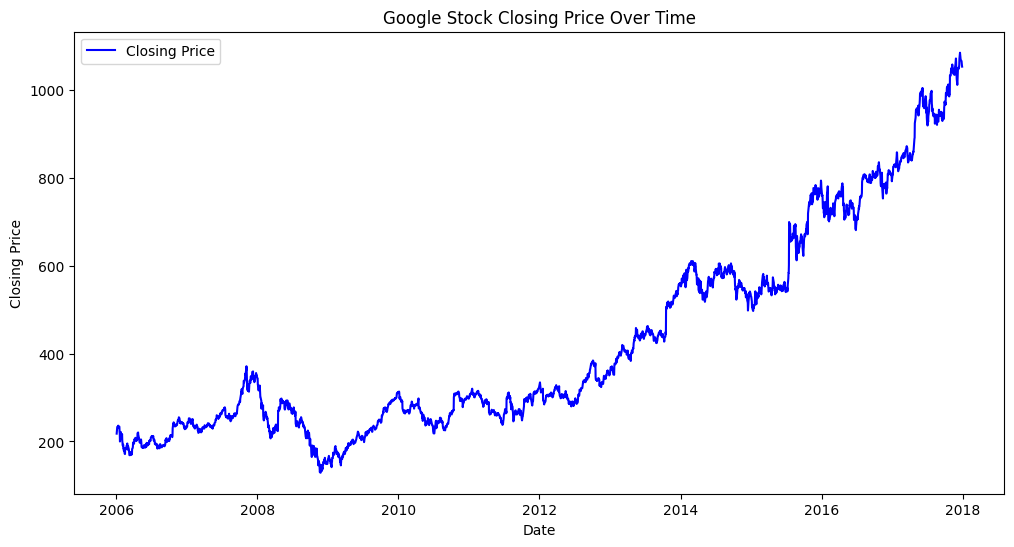


Performing Augmented Dickey-Fuller Test:
ADF Statistic: 1.322424136030217
p-value: 0.9967315857800989
Critical Values:
   1%: -3.4325396703967974
   5%: -2.862507454335551
   10%: -2.5672850015989264
The p-value is greater than 0.05, so we fail to reject the null hypothesis. The data is non-stationary.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_csv("/content/gdrive/MyDrive/Colab_Notebooks/APPLIED FORECASTING ALGORTHIMS/LAB03/GOOGL_2006-01-01_to_2018-01-01.csv", parse_dates=["Date"], index_col="Date")

# Display basic information about the dataset
print(df.info())
print(df.head())

# Plot the closing price over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y="Close", label="Closing Price", color='blue')
plt.title("Google Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Augmented Dickey-Fuller (ADF) Test
print("\nPerforming Augmented Dickey-Fuller Test:")
adf_test = adfuller(df["Close"])  # Applying the test on the 'Close' column

# Extract results
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

# Print the results
print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Interpretation
if p_value < 0.05:
    print("The p-value is less than 0.05, so we reject the null hypothesis. The data is stationary.")
else:
    print("The p-value is greater than 0.05, so we fail to reject the null hypothesis. The data is non-stationary.")


This code checks the stationarity of Google stock prices. It first visualizes the closing price trend and then applies the Augmented Dickey-Fuller (ADF) test, which tests for the presence of a unit root. If the p-value is below 0.05, the series is stationary; otherwise, it is non-stationary.

## 2. Check for Random Walk

### ● Examine whether the stock prices follow a random walk.
  - **Hint:** Check if the time series is non-stationary. If it is non-stationary, then check if the first difference of the series is stationary.
  - Use **visualizations** and **statistical tests** to support your conclusion.


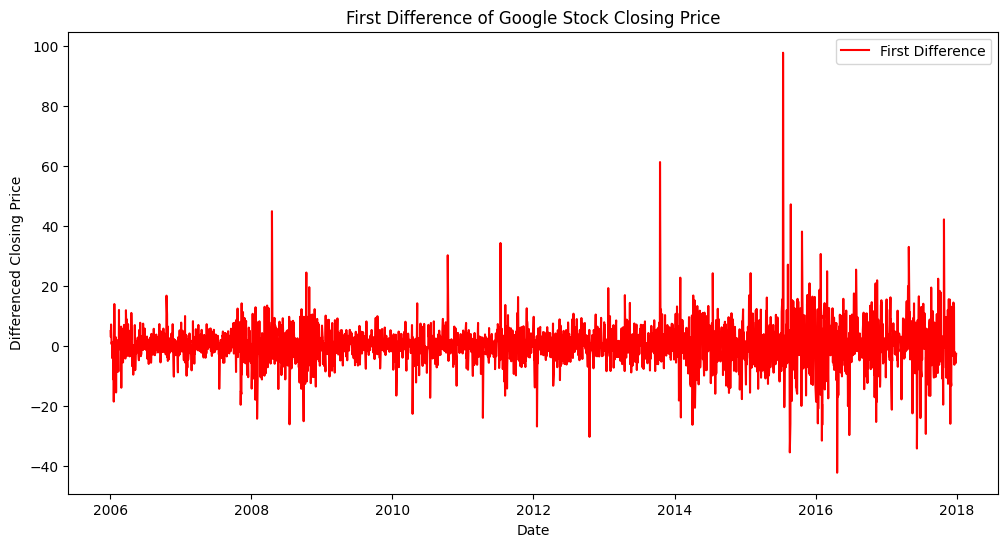


Performing Augmented Dickey-Fuller Test on First Difference:
ADF Statistic (First Difference): -10.71553873600114
p-value (First Difference): 3.2487316502654457e-19
Critical Values (First Difference):
   1%: -3.432540403849221
   5%: -2.862507778275112
   10%: -2.5672851740608125
The first difference is stationary. The original series follows a random walk.


In [ ]:
# Check for Random Walk
# If the data is non-stationary, check first differences
if p_value > 0.05:
    df["Close_diff"] = df["Close"].diff().dropna()

    # Plot first difference
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x=df.index, y="Close_diff", label="First Difference", color='red')
    plt.title("First Difference of Google Stock Closing Price")
    plt.xlabel("Date")
    plt.ylabel("Differenced Closing Price")
    plt.legend()
    plt.show()

    # ADF test on first difference
    print("\nPerforming Augmented Dickey-Fuller Test on First Difference:")
    adf_test_diff = adfuller(df["Close_diff"].dropna())

    # Extract results
    adf_statistic_diff = adf_test_diff[0]
    p_value_diff = adf_test_diff[1]
    critical_values_diff = adf_test_diff[4]

    # Print the results
    print(f"ADF Statistic (First Difference): {adf_statistic_diff}")
    print(f"p-value (First Difference): {p_value_diff}")
    print("Critical Values (First Difference):")
    for key, value in critical_values_diff.items():
        print(f"   {key}: {value}")

    # Interpretation
    if p_value_diff < 0.05:
        print("The first difference is stationary. The original series follows a random walk.")
    else:
        print("The first difference is still non-stationary. The series may not be a random walk but has other underlying trends.")


This code checks if the stock prices follow a random walk by differencing the data if it's non-stationary. It first computes the first difference of closing prices and visualizes it. Then, it applies the Augmented Dickey-Fuller (ADF) test on the differenced data to check for stationarity. If the first difference is stationary (p-value < 0.05), the original series likely follows a random walk.

## 3. Apply Decomposition

### ● Apply both additive and multiplicative decomposition to the time series.
  
### ● Plot the decomposed components:
  - **Trend**
  - **Seasonal**
  - **Residual**


<Figure size 1200x800 with 0 Axes>

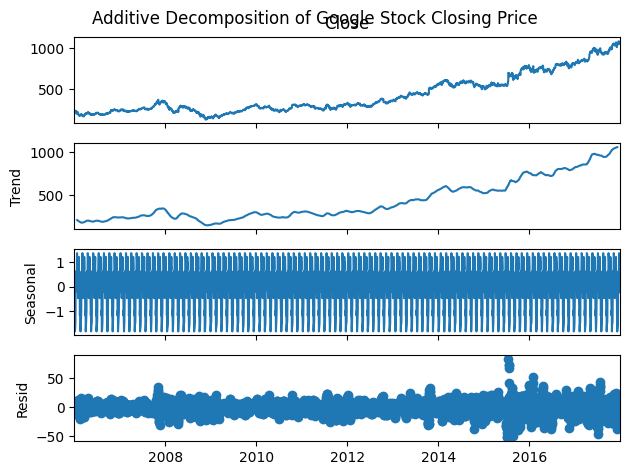

<Figure size 1200x800 with 0 Axes>

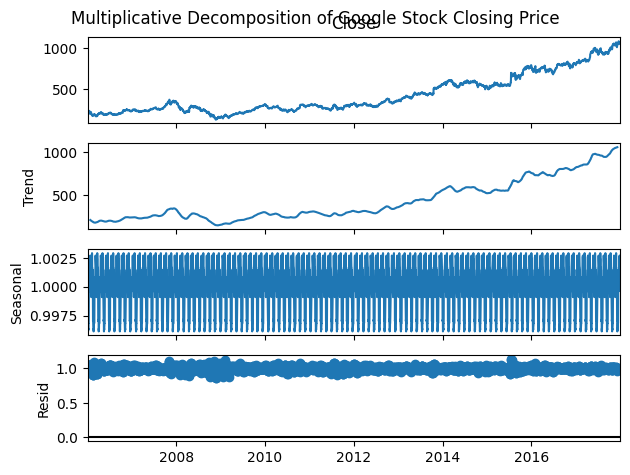

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
# Apply Time Series Decomposition (Additive)
decomposition_add = seasonal_decompose(df["Close"], model="additive", period=30)

plt.figure(figsize=(12, 8))
decomposition_add.plot()
plt.suptitle("Additive Decomposition of Google Stock Closing Price")
plt.show()

# Apply Time Series Decomposition (Multiplicative)
decomposition_mult = seasonal_decompose(df["Close"], model="multiplicative", period=30)

plt.figure(figsize=(12, 8))
decomposition_mult.plot()
plt.suptitle("Multiplicative Decomposition of Google Stock Closing Price")
plt.show()

This code performs time series decomposition to separate the Google stock closing price into trend, seasonal, and residual components. It applies both additive and multiplicative decomposition models using a period of 30 days. The decomposed components are then plotted to analyze the underlying patterns in the data.

## 4. Autocorrelation Analysis

### ● Plot the Autocorrelation Function (ACF)
  - Identify **significant lags**.
  - Use these plots to help determine the parameters (**p** and **q**) for the **MA models**.


<Figure size 1200x600 with 0 Axes>

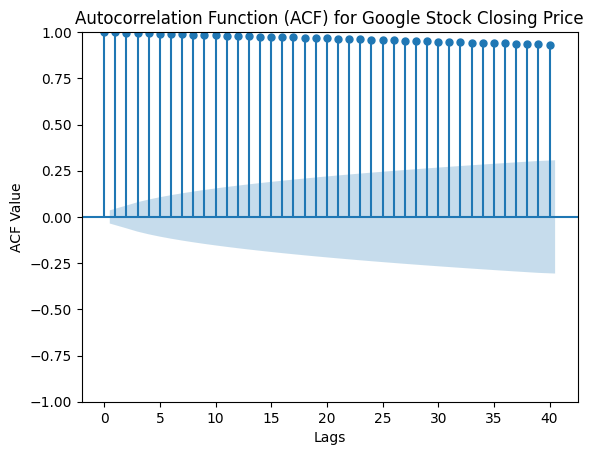

<Figure size 1200x600 with 0 Axes>

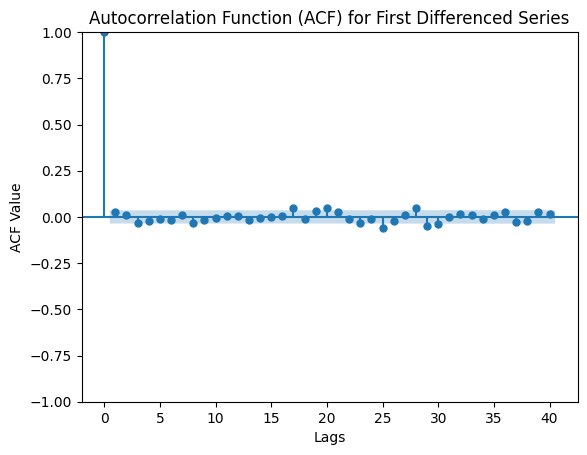

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Autocorrelation Analysis
plt.figure(figsize=(12, 6))
plot_acf(df["Close"].dropna(), lags=40)
plt.title("Autocorrelation Function (ACF) for Google Stock Closing Price")
plt.xlabel("Lags")
plt.ylabel("ACF Value")
plt.show()

# If the series is non-stationary, apply first difference and recheck ACF
if p_value > 0.05:
    plt.figure(figsize=(12, 6))
    plot_acf(df["Close_diff"].dropna(), lags=40)
    plt.title("Autocorrelation Function (ACF) for First Differenced Series")
    plt.xlabel("Lags")
    plt.ylabel("ACF Value")
    plt.show()

This code performs autocorrelation analysis using the Autocorrelation Function (ACF) plot. It first plots the ACF for the original closing prices to identify lag dependencies. If the series is non-stationary (p-value > 0.05), it applies the first difference and rechecks the ACF to analyze short-term dependencies in the differenced series.

5. Implementing Models
You are required to implement the following time series models:
a. Moving Average Model (MA)

● Implement an MA model using the order identified from ACF.
● Provide a model summary and discuss the results.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Moving Average (MA) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3019
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -18749.511
Date:                Fri, 28 Feb 2025   AIC                          37505.023
Time:                        09:46:38   BIC                          37523.061
Sample:                             0   HQIC                         37511.509
                               - 3019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        428.0969      6.189     69.169      0.000     415.966     440.227
ma.L1          0.9843      0.003    339.216      0.000       0.979       0.990
sigma2       1.4

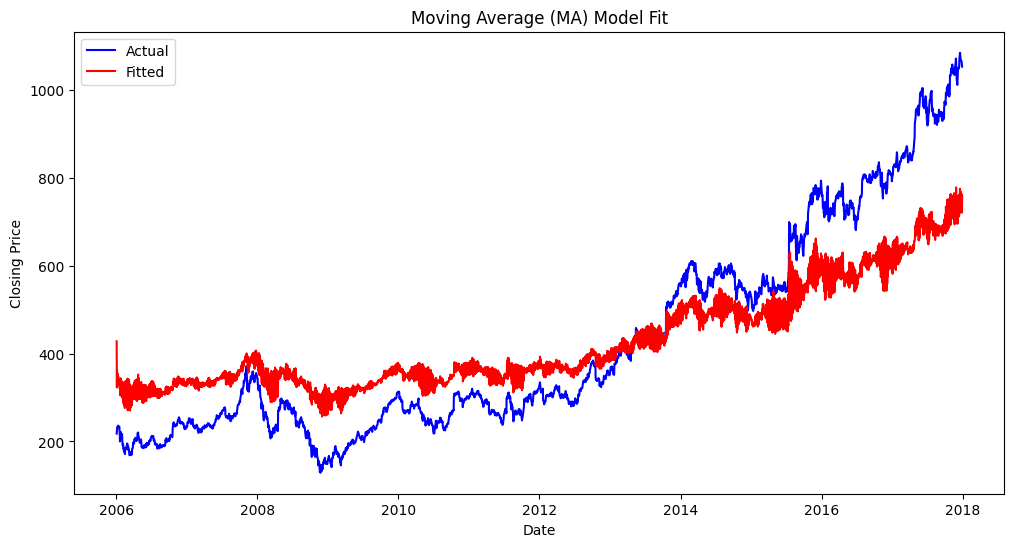

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
# Implement Moving Average (MA) Model
# Selecting the MA order from ACF analysis (assume q=1 for simplicity)
q = 1
ma_model = ARIMA(df["Close"], order=(0, 0, q))  # MA(q) model
ma_result = ma_model.fit()

# Print model summary
print("\nMoving Average (MA) Model Summary:")
print(ma_result.summary())

# Plot the MA model predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Actual", color="blue")
plt.plot(df.index, ma_result.fittedvalues, label="Fitted", color="red")
plt.title("Moving Average (MA) Model Fit")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

This code implements a Moving Average (MA) model to model the Google stock closing prices. It selects an MA order (q=1) based on ACF analysis and fits an ARIMA(0,0,1) model. The fitted values are then plotted against the actual prices to visualize how well the MA model captures short-term dependencies in the data.

5. Implementing Models
You are required to implement the following time series models:
a. Moving Average Model (MA)

● Implement an MA model using the order identified from ACF.
● Provide a model summary and discuss the results.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
# Evaluation Metrics
y_actual = df["Close"].dropna()
y_pred = ma_result.fittedvalues

rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
mape = mean_absolute_percentage_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

print("\nEvaluation Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-square: {r2}")


Evaluation Metrics:
Root Mean Squared Error (RMSE): 120.49727910544489
Mean Absolute Percentage Error (MAPE): 0.28526816126995475
R-square: 0.7399768623738925


## Evaluation Metrics for MA Model

The following metrics are used to assess the performance of the **Moving Average (MA) model**:

- **Root Mean Squared Error (RMSE):** Measures the average error magnitude; lower values indicate better fit.  
- **Mean Absolute Percentage Error (MAPE):** Represents the percentage error; lower values indicate higher accuracy.  
- **R-square (R²):** Measures how well the model explains the variance in actual stock prices; closer to 1 indicates a better fit.  

